<h1>Fourier series</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

plt.rc('axes',grid=True,labelsize='x-large')
plt.rc('legend',fontsize='large')
plt.rc('grid',lw=0.5)
plt.rc('lines',markersize=10)
plt.rc('figure',figsize=(8,4))

np.seterr('ignore');

In [2]:
def fourier_series(f,t,n):
    
    # f is a t-periodic function
    # t is the period
    # n+2 is the desired number of Fourier harmonics
    
    m = 2*n+2
    ts = np.linspace(0,t,m,endpoint=False)
    ws = 2*np.pi*m/t*np.fft.rfftfreq(m)
    
    return np.fft.rfft(f(ts))/m,ws

In [3]:
xs = np.linspace(0,4*np.pi,500,endpoint=False)
func = lambda x: 0.5*(1+square(x*2))*np.cos(x)

n = 1000
ft_n = fourier_series(func,2*np.pi,n)
ft_a = lambda x: x%2/(np.pi)*(1/(x-1)*(((x-1)/2)%2)+1/(x+1)*(((x+1)/2)%2)) * (-1)
ft_a_2 = lambda x: -1/(np.pi*(x))

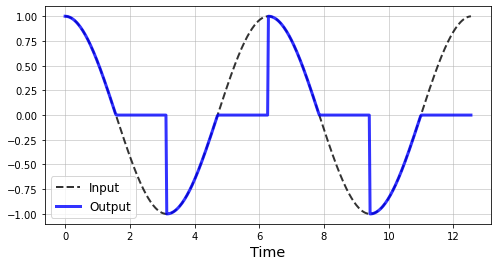

In [4]:
plt.figure(1,clear=True)
plt.plot(xs,np.cos(xs),'k--',lw=2,alpha=0.8)
plt.plot(xs,func(xs),'b-',lw=3,alpha=0.8)
plt.legend(['Input','Output'])
plt.xlabel('Time');

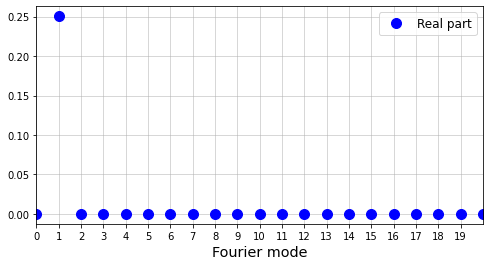

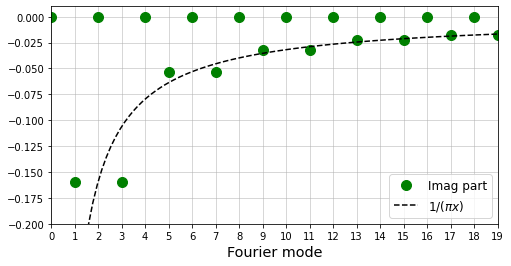

In [5]:
plt.figure(2,clear=True)
plt.plot(ft_n[1],np.real(ft_n[0]),'bo')
plt.xlim(0,20); plt.xticks(np.arange(20))
plt.xlabel('Fourier mode')
plt.legend(['Real part']);

plt.figure(3,clear=True)
plt.plot(ft_n[1],np.imag(ft_n[0]),'go')
plt.xlim(0,2); plt.xticks(np.arange(20)); plt.ylim(-0.2,0.01)
#plt.plot(np.arange(1,n,2),ft_a(np.arange(1,n,2)),'kx')
plt.plot(np.linspace(1,20,100),ft_a_2(np.linspace(1,20,100)),'k--')
plt.xlabel('Fourier mode')
plt.legend(['Imag part','$1/(\pi x)$']);